In [89]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, and_

import pandas as pd

from matplotlib import pyplot as plt

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [3]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [4]:
# Map

Measurement = Base.classes.measurements
Station = Base.classes.stations

In [5]:
# create a session
session = Session(engine)

In [6]:
# Design a query to retrieve the last 12 months of precipitation data.

# Most recent date is 2017-08-23
# Picking 2017-08-17 to 2017-08-23 as vacation dates

measures = (session
          .query(Measurement)
          .filter(Measurement.date > '2016-08-23'))

In [7]:
# Select only the `date` and `prcp` values.
yr_measures_df = pd.read_sql(measures.statement, session.bind)
yr_precip_df = yr_measures_df[['date','prcp']]

# Set index to date
yr_precip_df.set_index('date', inplace=True)

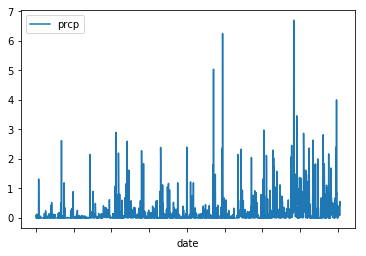

In [8]:
yr_precip_df.plot(y='prcp')

In [9]:
# Design a query to calculate the total number of stations.

station_count = (session
                 .query(Station)
                 .count())

print(f'There are {station_count} stations.')

There are 9 stations.


In [10]:
# Design a query to find the most active stations.

from sqlalchemy import func

station_count = (session
                .query(Measurement.station, func.count(Measurement.prcp))
                .group_by(Measurement.station)
                .order_by(func.count(Measurement.prcp).desc()))

for row in station_count:
    print(row)
    
print('USC00519281 has the most readings.')

('USC00519281', 2772)
('USC00513117', 2696)
('USC00519397', 2685)
('USC00519523', 2572)
('USC00516128', 2484)
('USC00514830', 1937)
('USC00511918', 1932)
('USC00517948', 683)
('USC00518838', 342)
USC00519281 has the most readings.


In [14]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.
# Plot the results as a histogram with `bins=12`.

yr_measures_df_USC00519281 = yr_measures_df[yr_measures_df['station'] == 'USC00519281']

yr_tobs_USC00519281 = yr_measures_df_USC00519281[['date', 'tobs']]



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114e175f8>]],
      dtype=object)

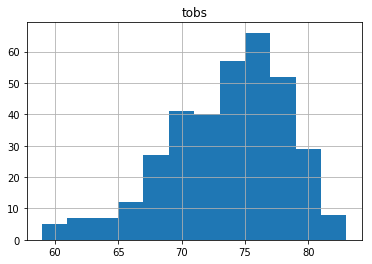

In [19]:
yr_tobs_USC00519281.hist(bins=12)

In [84]:
# Write function called `calc_temps` to accept start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps():
    
    global max_temp, min_temp, avg_temp
    
    start_dt = input('Start date for range? %Y-%m-%d : ')
    end_dt = input('End date for range? : ')
    
    temps = (session
             .query(Measurement.tobs)
             .filter(and_((Measurement.date >= '20' + start_dt), 
                          (Measurement.date <= '20' + end_dt))))

    
    temps_df = pd.read_sql(temps.statement, session.bind)

    max_temp = float(temps_df.max())
    min_temp = float(temps_df.min())
    avg_temp = float(round(temps_df.mean(), 1))
    
    print(f'Max temperature : {max_temp}\nMin temperature : {min_temp}\nAverage temperature : {avg_temp}')


In [51]:

# Input is acting funny while being called from ipynb file, just going to duplicate the code

# Plot the min, avg, and max temperature from your previous query as a bar chart.

  # Use the average temperature as the bar height.

  # Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

Max temperature : 87.0
Min temperature : 58.0
Average temperature : 73.67


In [85]:
# Calculate the min, avg, and max temps for  trip from the previous year
# Dates: 16-08-17 to 16-08-23 as vacation dates

calc_temps()

Start date for range? %Y-%m-%d : 16-08-17
End date for range? : 16-08-23
Max temperature : 82.0
Min temperature : 72.0
Average temperature : 78.1


(-1, 1)

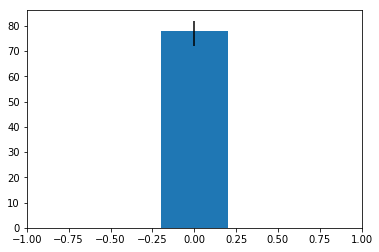

In [136]:
# Use the average temperature as the bar height.
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).


plt.bar(0, height=avg_temp, width = 0.4)
plt.vlines(0, min_temp, max_temp)
plt.xlim(-1, 1)


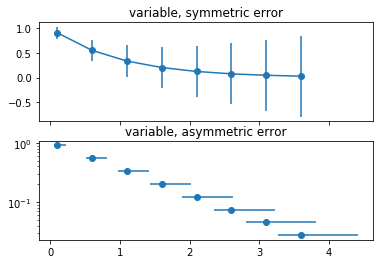